In [4]:
#data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Importing DataSet
train_df = pd.read_csv('C:/Users/rajsingh/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/rajsingh/Downloads/test.csv')

In [6]:
#Get the Details of DataSet
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#Goal is to make a model which can predict survival
train_df['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Hence we can see that 38% of people had survived in Titanic disaster and 61% died

In [8]:
train_df.loc[train_df['Sex'] == 'male', 'Sex'] = 0
train_df.loc[train_df['Sex'] == 'female', 'Sex'] = 1

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(train_df["Embarked"].unique())
train_df["Embarked"] = train_df["Embarked"].fillna("S")

train_df.loc[train_df["Embarked"] == "S", "Embarked"] = 0
train_df.loc[train_df["Embarked"] == "C", "Embarked"] = 1
train_df.loc[train_df["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch",
              "Fare", "Embarked"]
X_train, X_test, y_train, y_test = train_test_split(train_df[predictors], train_df["Survived"])

In [33]:
forest = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                random_state=0)
forest.fit(X_train, y_train)
print("Random Forest score: {0:.2}".format(forest.score(X_test, y_test)))

Random Forest score: 0.83


([<matplotlib.axis.XTick at 0xc9cb198>,
 <a list of 7 Text xticklabel objects>)

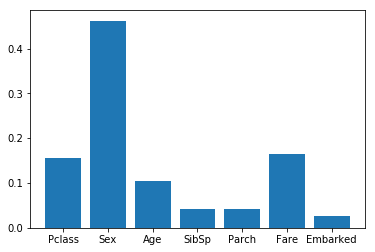

In [34]:
#now plotting the graps with Features and pick the best feature as good contributor to model

plt.bar(np.arange(len(predictors)), forest.feature_importances_)
plt.xticks(np.arange(len(predictors)), predictors)

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [39]:
test_df.loc[test_df['Sex'] == 'male', 'Sex'] = 0
test_df.loc[test_df['Sex'] == 'female', 'Sex'] = 1

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
#Now making submission in to Prediction

predictors = ["Sex", "Fare", "Pclass", "Age", "SibSp"]
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=0)
clf.fit(train_df[predictors], train_df["Survived"])
prediction = clf.predict(test_df[predictors])

submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": prediction})
submission.to_csv("submission.csv", index=False)



Now the submission.csv file created withPreduction feature